In [86]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [87]:
mnist = tf.keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(len(x_train),784)
x_test = x_test.reshape(len(x_test),784)
x_train, x_test = x_train / 255.0, x_test / 255.0 
print(x_test.shape)

(10000, 784)


In [88]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='sigmoid', name='encoder1'),
    tf.keras.layers.Dense(10, activation='sigmoid', name='encoder2'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='decoder1'),
    tf.keras.layers.Dense(28*28, activation='sigmoid',name='decoder2'),
])

In [89]:
model.compile(optimizer='adam', # 경사 하강법 Adam : RMSProp + Momentum
              loss='binary_crossentropy',
              metrics=['accuracy']
             ) 

In [90]:
model.fit(x_train, x_train, epochs=5)# 훈련

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2348 - accuracy: 0.0114
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1821 - accuracy: 0.0076
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1621 - accuracy: 0.0101
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1509 - accuracy: 0.0109
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1454 - accuracy: 0.0106


In [91]:
model.evaluate(x_test,  x_test, verbose=2) # 검증
output_img = model.predict(x_test)

313/313 - 1s - loss: 0.1422 - accuracy: 0.0069


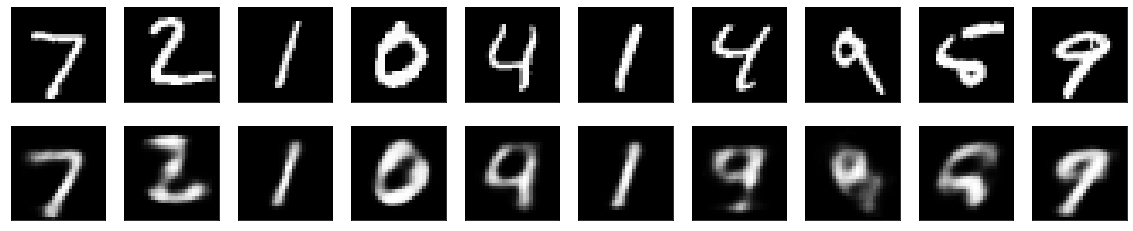

In [92]:
plt.figure(figsize =(20,4))
for i in range(10):
    
    ax = plt.subplot(2,10,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,10,i+1+10)
    plt.imshow(output_img[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()